<a href="https://colab.research.google.com/github/Vaikuntha-04/ML-Codes/blob/main/Prac_7_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sys

!{sys.executable} -m pip install xgboost scikit-learn


df = pd.read_csv('diabetes.csv')
display(df.head())
display(df.info())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

Shape of the DataFrame: (768, 9)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


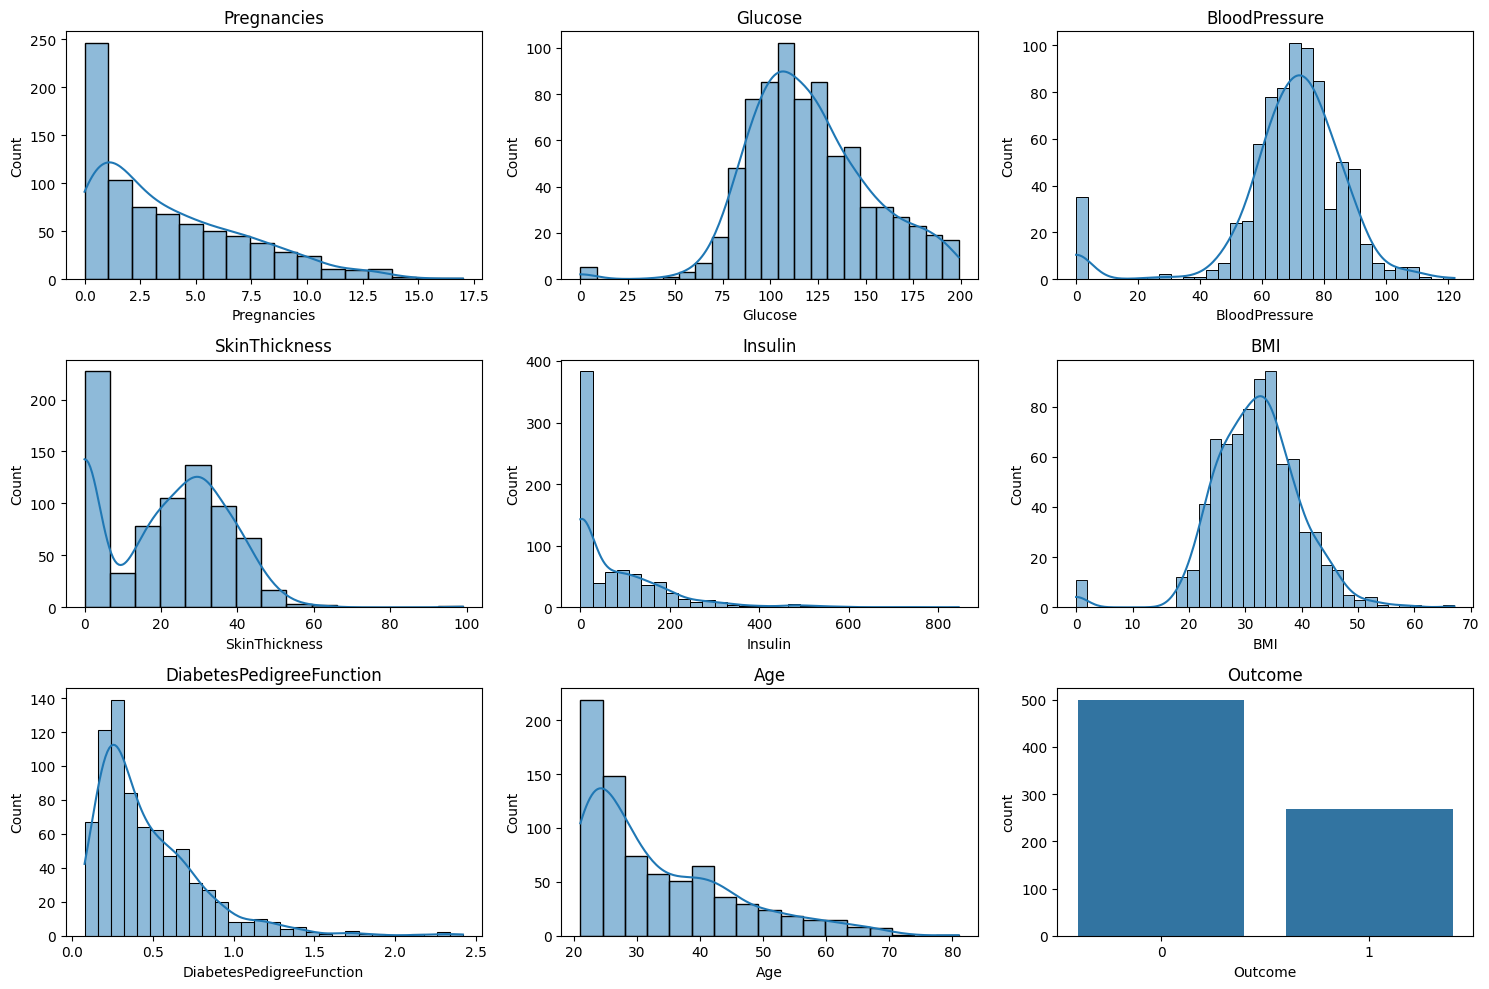


Target Variable: Outcome


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Shape of the DataFrame: {df.shape}")

print("\nDataFrame Info:")
display(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    if col == 'Outcome':
        sns.countplot(x=col, data=df)
    else:
        sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


target_variable = 'Outcome'
print(f"\nTarget Variable: {target_variable}")



In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age','DiabetesPedigreeFunction']

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for col in cols_with_zeros:
    X_train[col] = X_train[col].replace(0, np.nan)
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)

display(X_train.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.874593,121.664495,72.627036,29.219870,142.469055,32.628827,0.466471,33.594463
std,3.443637,30.264653,12.012608,8.844065,88.574564,6.994339,0.333203,12.016168
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,120.500000,27.600000,0.238000,24.000000
50%,3.000000,118.000000,72.000000,29.000000,126.000000,32.400000,0.369000,29.000000
75%,6.000000,141.000000,80.000000,32.750000,130.000000,36.775000,0.606500,41.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train)
X_train_final['Outcome'] = y_train.values
X_test_final = pd.DataFrame(X_test)
X_test_final['Outcome'] = y_test.values

display(X_train_final.head())
display(X_test_final.head())

,0,1,2,3,4,5,6,7,Outcome
0,0.908329,0.937021,0.447642,-0.024881,-0.186086,0.367907,0.677404,1.699558,1
1,0.036447,-0.815625,-1.052006,-0.703855,-0.186086,-0.633718,-0.070497,-0.965692,0
2,-1.126063,1.433053,1.447407,0.427768,6.073631,2.814735,-0.118555,-0.882403,0
3,-0.835435,-0.418799,-1.385261,-0.930180,-0.084394,-1.062986,1.100914,-0.882403,0
4,1.198956,-0.055043,-0.052241,-0.024881,-0.186086,-0.376157,-0.851438,0.366933,1


,0,1,2,3,4,5,6,7,Outcome
0,-0.835435,2.557391,0.281014,1.559392,-1.609776,1.469695,2.785944,-0.965692,1
1,-0.544808,-0.484937,0.114387,0.088281,-0.479863,0.138964,-0.187638,-0.882403,0
2,0.036447,-1.510069,-0.885378,-3.306590,-1.609776,0.196200,-0.226685,-0.715825,0
3,0.327074,1.466121,-0.052241,-1.156505,0.367571,-0.977132,0.362024,1.449691,1
4,-1.126063,-0.352662,-0.635437,-3.306590,-1.609776,-1.148840,0.581288,-0.216090,0


In [15]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

xgb_model = XGBClassifier()
ada_model = AdaBoostClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

X_train = X_train_final.drop('Outcome', axis=1)
y_train = X_train_final['Outcome']

xgb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


X_test = X_test_final.drop('Outcome', axis=1)
y_test = X_test_final['Outcome']

model_metrics = {}

xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
model_metrics['XGBoost'] = {
    'accuracy': accuracy_score(y_test, xgb_pred),
    'precision': precision_score(y_test, xgb_pred),
    'recall': recall_score(y_test, xgb_pred),
    'f1': f1_score(y_test, xgb_pred),
    'roc_auc': roc_auc_score(y_test, xgb_proba)
}

ada_pred = ada_model.predict(X_test)
ada_proba = ada_model.predict_proba(X_test)[:, 1]
model_metrics['AdaBoost'] = {
    'accuracy': accuracy_score(y_test, ada_pred),
    'precision': precision_score(y_test, ada_pred),
    'recall': recall_score(y_test, ada_pred),
    'f1': f1_score(y_test, ada_pred),
    'roc_auc': roc_auc_score(y_test, ada_proba)
}

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
model_metrics['RandomForest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred),
    'roc_auc': roc_auc_score(y_test, rf_proba)
}

gb_pred = gb_model.predict(X_test)
gb_proba = gb_model.predict_proba(X_test)[:, 1]
model_metrics['GradientBoosting'] = {
    'accuracy': accuracy_score(y_test, gb_pred),
    'precision': precision_score(y_test, gb_pred),
    'recall': recall_score(y_test, gb_pred),
    'f1': f1_score(y_test, gb_pred),
    'roc_auc': roc_auc_score(y_test, gb_proba)
}


for model_name, metrics in model_metrics.items():
    print(f"Evaluation Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")
    print("-" * 20)

Evaluation Metrics for XGBoost:
  accuracy: 0.7662337662337663
  precision: 0.6170212765957447
  recall: 0.6170212765957447
  f1: 0.6170212765957447
  roc_auc: 0.8454961224895605
--------------------
Evaluation Metrics for AdaBoost:
  accuracy: 0.7987012987012987
  precision: 0.6904761904761905
  recall: 0.6170212765957447
  f1: 0.651685393258427
  roc_auc: 0.8388347584012725
--------------------
Evaluation Metrics for RandomForest:
  accuracy: 0.7402597402597403
  precision: 0.6060606060606061
  recall: 0.425531914893617
  f1: 0.5
  roc_auc: 0.8385364883674687
--------------------
Evaluation Metrics for GradientBoosting:
  accuracy: 0.7922077922077922
  precision: 0.7027027027027027
  recall: 0.5531914893617021
  f1: 0.6190476190476191
  roc_auc: 0.8301849274209585
--------------------


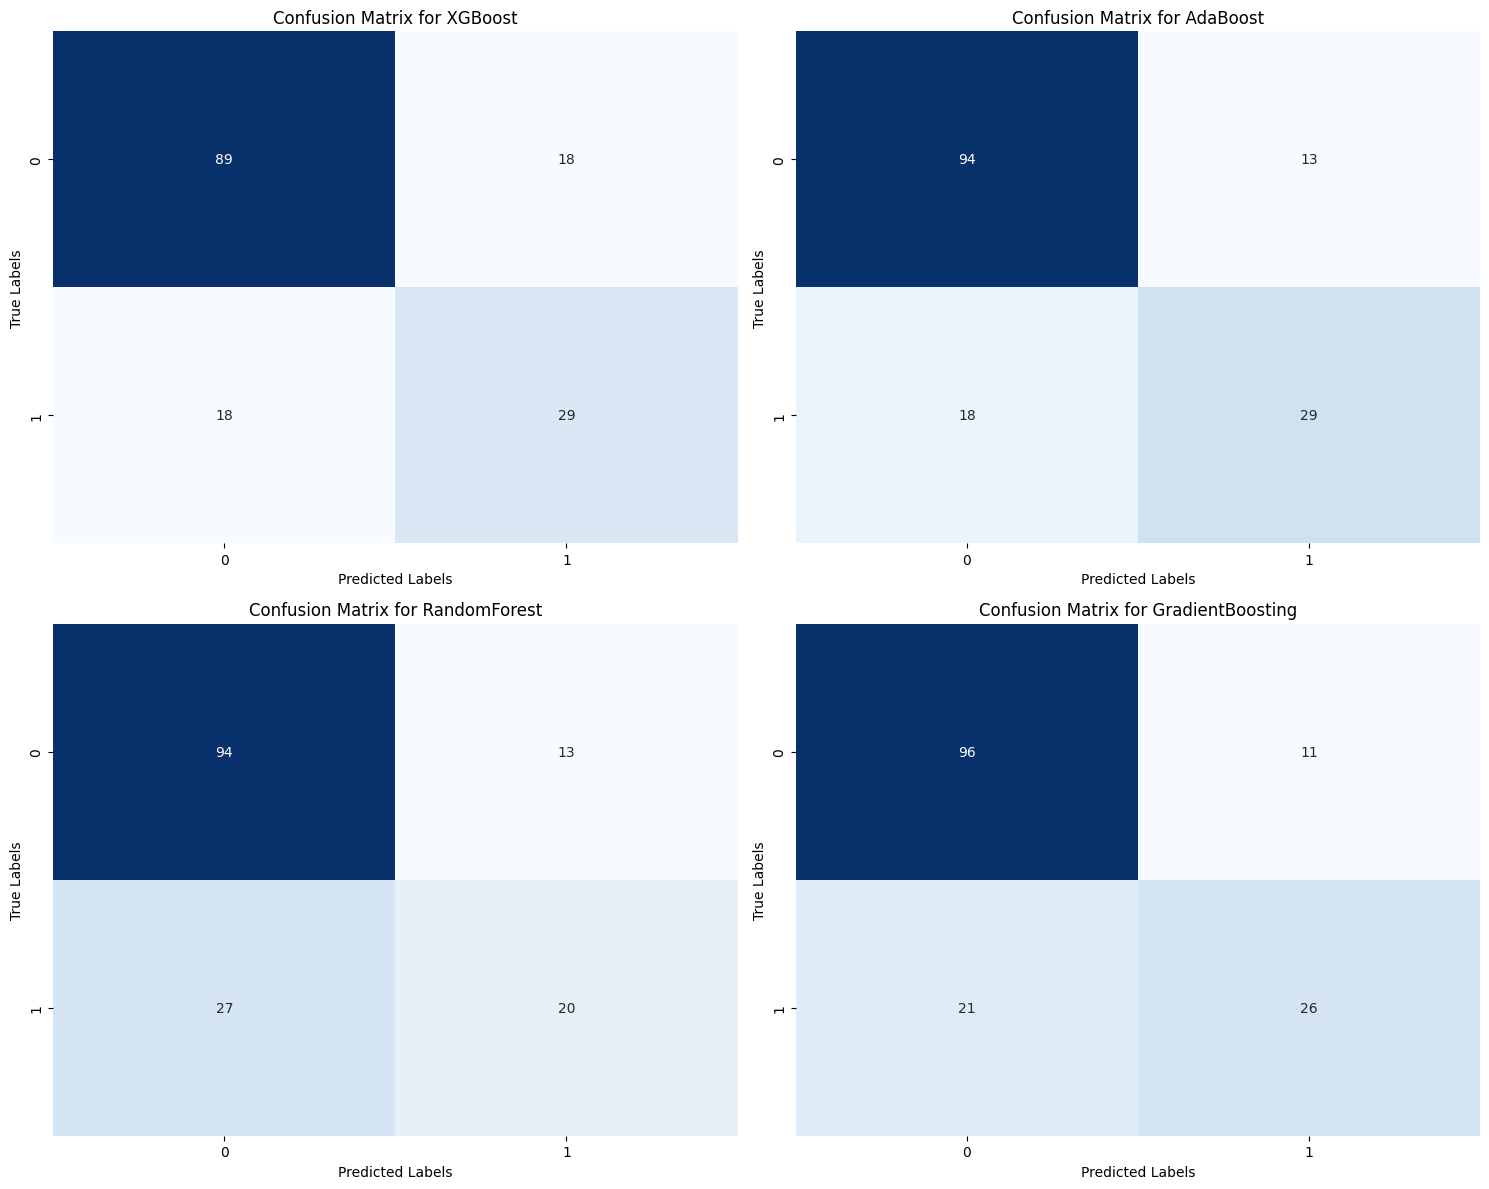

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    'XGBoost': xgb_model,
    'AdaBoost': ada_model,
    'RandomForest': rf_model,
    'GradientBoosting': gb_model
}

plt.figure(figsize=(15, 12))

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

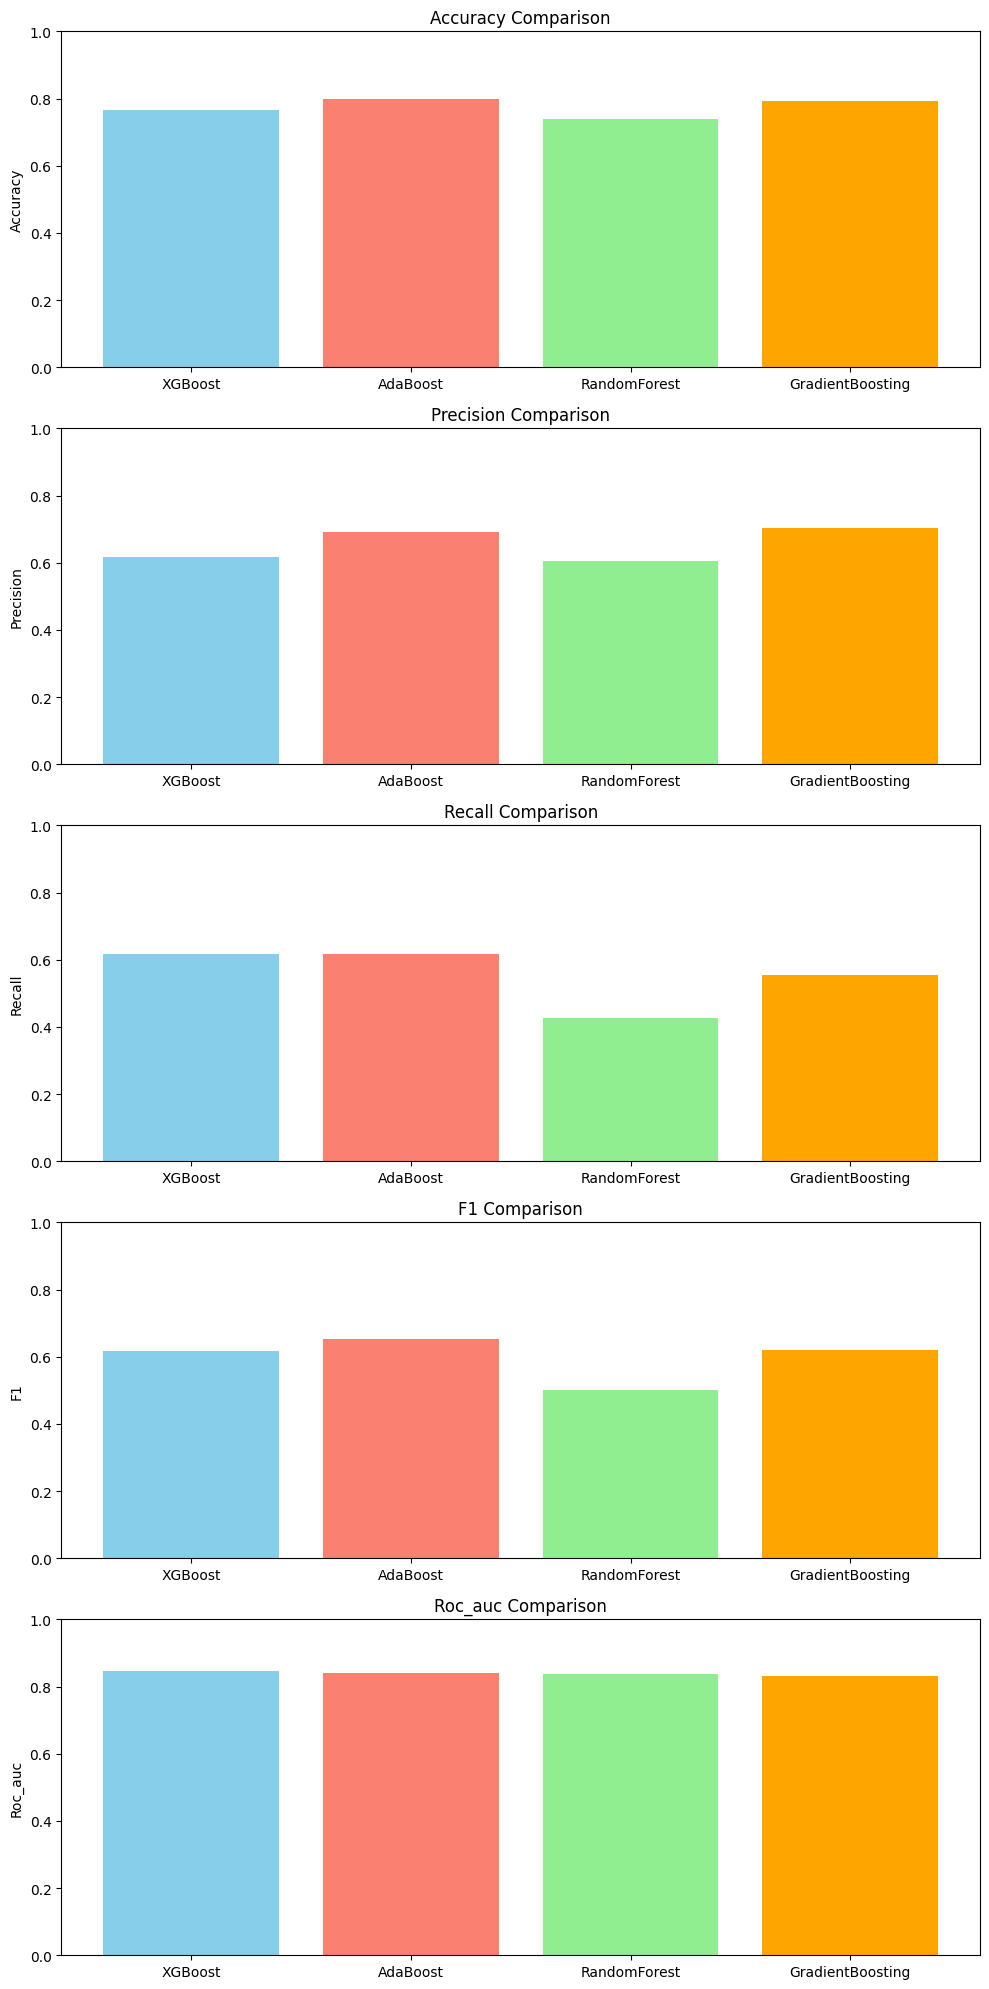

In [19]:
import matplotlib.pyplot as plt

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
models = ['XGBoost', 'AdaBoost', 'RandomForest', 'GradientBoosting']

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 20))

for i, metric in enumerate(metrics):
  values = [model_metrics[model][metric] for model in models]
  axes[i].bar(models, values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
  axes[i].set_ylabel(metric.capitalize())
  axes[i].set_ylim(0, 1.0)
  axes[i].set_title(f'{metric.capitalize()} Comparison')

plt.tight_layout()
plt.show()